# Quantization and sampling


Quantization is the process of mapping input values from a large set  to output values in a  smaller set with a finite number of elements or sample points . Quantization is involved to some degree in nearly all digital signal processing, as the process of representing a signal in digital form ordinarily involves rounding off to particular amount of samples . Quantization also forms the core of essentially all lossy compression algorithms.

Now let us look on generation os sine signal using python code


In [4]:
import numpy as np
import matplotlib.pyplot as plot

After importing matplotlib and numpy libraries  let us define the signal parameters to generate sine wave

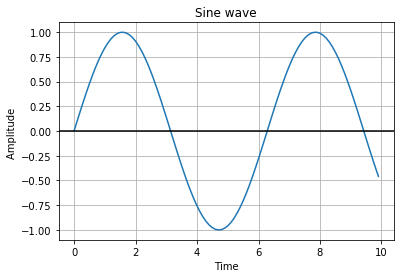

In [2]:
# Get x values of the sine wave
time        = np.arange(0, 10, 0.1);

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)


# Matplotlib plotting
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude ') 
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

# Quantization of signals 

The quantizing of an analog signal is done by discretizing the signal with a number of quantization levels. Quantization is representing the sampled values of the amplitude by a finite set of levels, which means converting a continuous-amplitude sample into a discrete-time signal.


### Types of Quantization

There are two types of Quantization

- Uniform Quantization
The type of quantization in which the quantization levels are uniformly spaced is termed as a *Uniform Quantization* . 

- Non-uniform Quantization.
The type of quantization in which the quantization levels are unequal and mostly the relation between them is logarithmic, is termed as a *Non-uniform Quantization*.

# Nyquist Theorem

Let us  consider a continuous  time-varying signal -  x(t). 
We record this physical signal  and we obtain a digital signal with a sampling rate of fs. 
The original analog signal has an infinite precision, whereas the recorded signal has a finite precision. 
Therefore, we expect to lose information in the analog-to-digital process (ADC) .

The *Nyquist* sampling theorem states that under certain conditions on the analog signal and the sampling rate, it is possible not to lose any information in the process. In other words, under these conditions, we can recover the exact original continuous signal from the sampled digital signal

The signal must be bandlimited, meaning that it must not contain any frequency higher than a certain cutoff *frequency B*. Additionally, the sampling rate fs needs to be at least twice as large as this frequency B. 

- The Nyquist rate is 2B. For a given bandlimited analog signal, it is the minimal sampling rate required to sample the signal without loss.
- The Nyquist frequency is fs/2. For a given sampling rate, it is the maximal frequency that the signal can contain in order to be sampled without loss.


In [37]:
import numpy as np
import matplotlib.pyplot as plt

time                = 0.005; 
analog_time         = np.linspace (0, time, 10e5);
sampling_rate       = 4000.; 
sampling_period     = 1. / sampling_rate; 
sample_number       = time / sampling_period;
sampling_time       = np.linspace (0, time, sample_number);
carrier_frequency   = 1000.;
amplitude           = 1;
phase               = 0;
quantizing_bits     = 2;
quantizing_levels   = 2 ** quantizing_bits / 2;
quantizing_step     = 1. / quantizing_levels;

Let us define a function for sine wave generation

we know sin ( 2 x pi x fc x t + phase angle ) 

In [9]:
def analog_signal (time_point):
    return amplitude * np.sin (2 * np.pi * carrier_frequency * time_point + phase);


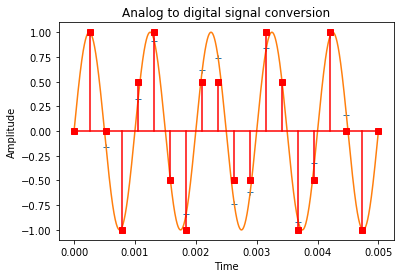

In [36]:
sampling_signal     = analog_signal (sampling_time);
quantizing_signal   = np.round (sampling_signal / quantizing_step) * quantizing_step;
fig = plt.figure ()
plt.plot (sampling_time, sampling_signal, '+')
plt.plot (analog_time,   analog_signal (analog_time) );
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-');

plt.title("Analog to digital signal conversion")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.show()

We have obtained quantized signal as a result of quantization

## Passive filters 

Passive filters are made up of passive components such as resistors, capacitors and inductors and have no amplifying elements  so have no signal gain, therefore their output level is always less than the input signal ( attenuated) .
These filters will  “filter-out” unwanted signals and an ideal filter will separate and pass sinusoidal input signals based upon their frequency. these  passive filters are generally constructed using simple RC (Resistor-Capacitor) networks, while higher frequency filters  are usually made from RLC components.

The frequency range of signals that they allow to pass through them will decide the name given to filter  The most commonly used filter designs are the:

- The Low Pass Filter –   allows low frequency signals until its  cut-off frequency, ƒc point to pass while blocking those any higher than that .


- The High Pass Filter –    allows high frequency signals starting from its cut-off frequency, ƒc point and higher to infinity to pass through while blocking those any lower.


- The Band Pass Filter –  allows signals falling within a certain frequency band setup between two points to pass through while blocking both the lower and higher frequencies either side of this frequency band.



### Low pass RC  filter
![](img1/lowpass.jpg)

A Low Pass Filter is a circuit that can be designed to modify or reject all unwanted high frequencies of an electrical signal and accept or pass only those signals wanted by the circuits designer. A simple passive RC Low Pass Filter or LPF made by connecting together in series a single Resistor with a single Capacitor .In this type of filter arrangement the input signal ( VIN ) is applied to the series combination but the output signal ( VOUT ) is taken across the capacitor only.So to summarize, the Low Pass Filter has a constant output voltage from D.C. (0Hz), up to a specified Cut-off frequency ( ƒC ) point.By plotting the networks output voltage against different values of input frequency, the Frequency Response Curve or Bode Plot function of the low pass filter circuit can be found

![](img1/lpfr.jpg)

This cut-off frequency point is 0.707 or -3dB.We can see from the results above, that as the frequency applied to the RC network increases , the voltage dropped across the capacitor and therefore the output voltage ( VOUT ) from the circuit decreases.

The frequency range “below” this cut-off point ƒC is generally known as the Pass Band as the input signal is allowed to pass through the filter. The frequency range “above” this cut-off point is generally known as the Stop Band as the input signal is blocked or stopped from passing through.




### High  pass RC  filter
![](img1/highpass.jpg)

A High Pass Filter is the exact opposite to the low pass filter circuit as the two components have been interchanged with the filters output signal now being taken from across the resistor. The passive high pass filter circuit  only passes signals above the selected cut-off point, ƒc eliminating any low frequency signals from the waveform. 
The reactance of the capacitor is very high at low frequencies so the capacitor acts like an open circuit and blocks any input signals at VIN until the cut-off frequency point ( ƒC ) is reached. Above this cut-off frequency point the reactance of the capacitor has reduced sufficiently as to now act more like a short circuit allowing all of the input signal to pass directly to the output as shown below in the filters response curve.The cut off frequency is calculated by fc= 1/2 x pi x R x C  

![](img1/hpfr.jpg)

We have seen that the Passive High Pass Filter is the exact opposite to the low pass filter. This filter has no output voltage from DC (0Hz), up to cut-off frequency ( ƒc ) point. This lower cut-off frequency point is 70.7% or -3dB of the voltage gain allowed to pass.

## second order filters 

in Second Order Filters  op-amp is used as a Voltage Controlled Voltage Source amplifier. These  are another important type of active filter design because along with the active first order RC filters . Higher order filter circuits can be designed using them.

Most common filter types being: 
- Butterworth
- Chebyshev
- Bessel 
- Sallen-Key. 

All these types of filter designs are availableas either: low pass filter, high pass filter, band pass filter and band stop (notch) filter configurations, and being second order filters, all have a 40-dB-per-decade roll-off.

The Sallen-Key filter design is one of the most widely known and popular 2nd order filter designs, requiring only a single operational amplifier for the gain control and four passive RC components to accomplish the tuning.


### program to implement  High pass filter  ( active - Butterworth) 

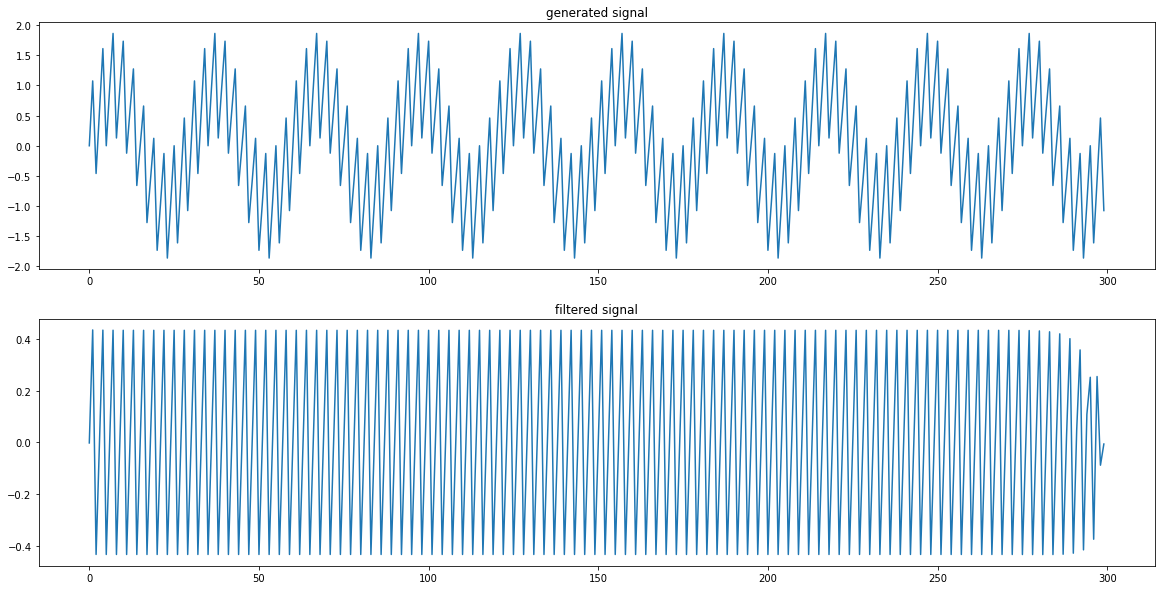

In [3]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# a function which generates sine wave required for imposing 
def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=t_sine)
    return result


#butterworth highpass filter function 
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 30
sine_fq = 10 #Hz
duration = 10 #seconds
sine_5Hz = sine_generator(fps,sine_fq,duration)
sine_fq = 1 #Hz
duration = 10 #seconds
sine_1Hz = sine_generator(fps,sine_fq,duration)

sine = sine_5Hz + sine_1Hz

filtered_sine = butter_highpass_filter(sine.data,10,fps)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(sine)),sine)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(filtered_sine)),filtered_sine)
plt.title('filtered signal')
plt.show()

# Low pass filter ( active - butterworth) 


The frequency response of the Butterworth Filter approximation function is also often referred to as “maximally flat” (no ripples) response because the pass band is designed to have a frequency response which is as flat as mathematically possible from 0Hz (DC) until the cut-off frequency at -3dB with no ripples

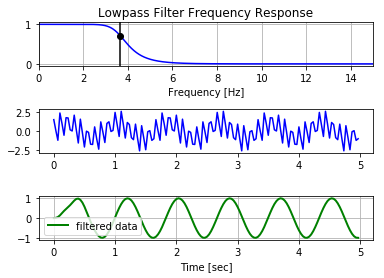

In [5]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)



T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)


plt.subplot(3, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()



plt.subplot(3, 1, 2)
plt.plot(t, data, 'b-', label='data')

plt.subplot(3, 1, 3)
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')

plt.subplots_adjust(hspace=1)
plt.grid()
plt.legend()
plt.show()